In [21]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from PIL import Image
import seaborn as sns

# Constants

In [4]:
image_size = (480, 640)

<hr>

# Load dataset

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Train/",
    image_size=image_size,
    seed=1234,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Test/",
    image_size=image_size,
    seed=1234,
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Validation/",
    image_size=image_size,
    seed=1234,
)
class_names = train_ds.class_names

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## preview data

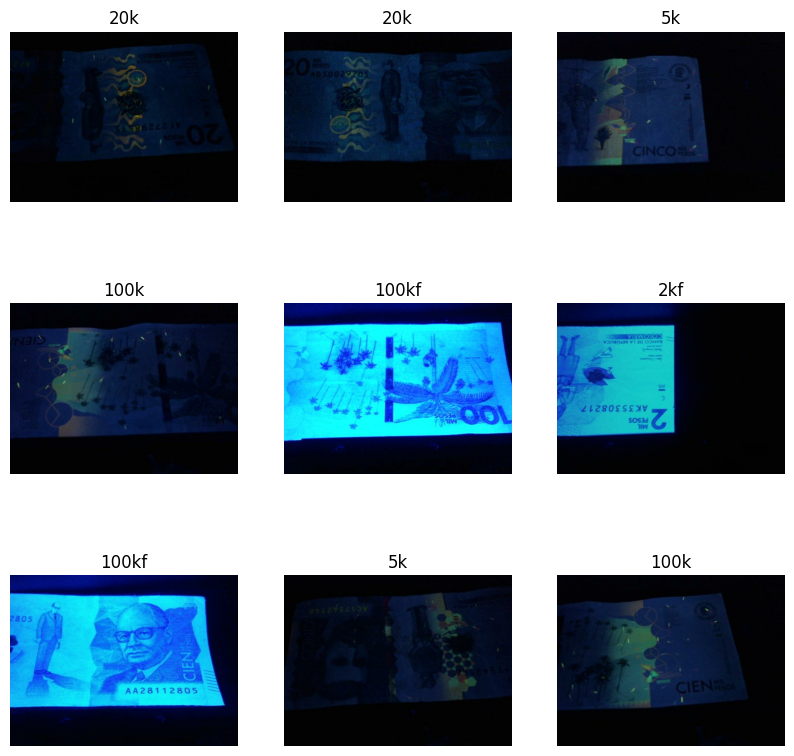

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

## Standardize the data

In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [8]:
normalized_ds = train_ds.map(lambda xx, yy: (normalization_layer(xx), yy))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.8313726


<hr/>

# Training

## Allow caching for performance

In [9]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Making model and Training

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(class_names))
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=3
)

Epoch 1/3
390/390 [==============================] - 590s 1s/step - loss: 0.5596 - accuracy: 0.7993 - val_loss: 0.0790 - val_accuracy: 0.9724
Epoch 2/3
390/390 [==============================] - 479s 1s/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 3/3
390/390 [==============================] - 482s 1s/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0214 - val_accuracy: 0.9937


## testing

In [11]:
predictions = model.predict(test_ds)

130/130 [==============================] - 52s 364ms/step


In [14]:
p_np = np.argmax(predictions, axis=-1)
p_np

array([ 6, 11,  3, ...,  9,  4,  3])

## Confusion Matrix

In [52]:
test_labels = list(
    test_ds.map(lambda x,y: y)
        .flat_map(tf.data.Dataset.from_tensor_slices)
        .as_numpy_iterator()
)
test_labels

[7,
 10,
 7,
 0,
 11,
 6,
 8,
 1,
 8,
 2,
 12,
 11,
 12,
 0,
 4,
 0,
 11,
 0,
 1,
 6,
 10,
 1,
 12,
 9,
 5,
 2,
 2,
 12,
 11,
 12,
 4,
 9,
 6,
 0,
 11,
 4,
 2,
 2,
 2,
 11,
 0,
 12,
 7,
 11,
 12,
 7,
 2,
 8,
 5,
 1,
 6,
 11,
 3,
 12,
 2,
 3,
 1,
 8,
 9,
 10,
 10,
 4,
 1,
 3,
 0,
 1,
 12,
 1,
 6,
 6,
 7,
 7,
 4,
 8,
 0,
 6,
 12,
 3,
 9,
 0,
 1,
 1,
 8,
 0,
 6,
 11,
 0,
 11,
 2,
 5,
 5,
 8,
 1,
 6,
 2,
 7,
 7,
 8,
 7,
 6,
 4,
 8,
 5,
 7,
 12,
 10,
 9,
 3,
 8,
 10,
 1,
 6,
 5,
 4,
 8,
 3,
 1,
 8,
 11,
 3,
 11,
 7,
 0,
 11,
 11,
 1,
 0,
 12,
 4,
 12,
 4,
 4,
 5,
 3,
 12,
 5,
 4,
 11,
 2,
 6,
 11,
 2,
 9,
 5,
 12,
 1,
 6,
 8,
 12,
 12,
 3,
 12,
 7,
 7,
 0,
 4,
 3,
 0,
 2,
 3,
 7,
 2,
 9,
 5,
 10,
 3,
 1,
 11,
 6,
 12,
 1,
 0,
 11,
 5,
 4,
 4,
 9,
 12,
 10,
 4,
 8,
 8,
 6,
 3,
 5,
 4,
 2,
 3,
 2,
 0,
 6,
 11,
 5,
 1,
 3,
 10,
 7,
 6,
 4,
 2,
 10,
 10,
 11,
 1,
 3,
 5,
 1,
 3,
 0,
 4,
 4,
 1,
 12,
 1,
 10,
 12,
 0,
 4,
 0,
 0,
 6,
 11,
 8,
 6,
 11,
 7,
 10,
 5,
 8,
 11,
 1,
 0,
 8,
 9,
 2,
 0

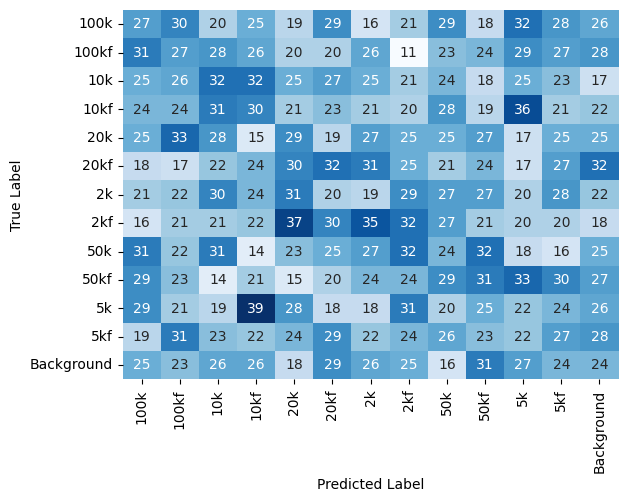

In [39]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(test_labels, p_np)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=class_names, yticklabels=class_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

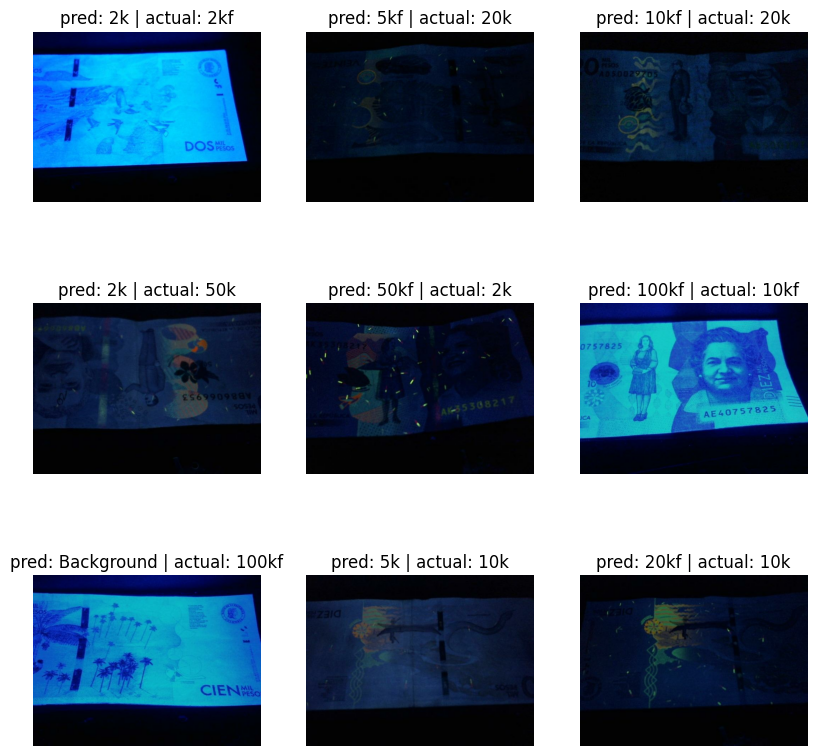

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"pred: {class_names[p_np[i]]} | actual: {class_names[labels[i]]}")
    plt.axis("off")
plt.show()